##  🌍 Анализ данных о значительных землетрясениях 1900-2023 гг.

##### Автор Андрей Самоленков

#### Датасет https://www.kaggle.com/datasets/jahaidulislam/significant-earthquake-dataset-1900-2023

#### Дата-словарь для понимания содержимого этого набора данных:

* **Time**: Время, когда произошло землетрясение.
* **Place**: Местоположение землетрясения.
* **Latitude**: Географическая широта, на которой произошло землетрясение.
* **Longitude**: Географическая долгота, на которой произошло землетрясение.
* **Depth**: Глубина землетрясения (расстояние от земной поверхности до фокуса землетрясения).
* **Mag**: Магнитуда землетрясения (мера энергии, высвобожденной в результате землетрясения).
* **MagType**: Тип магнитуды (например, "mb" для магнитуды телевизионных волн).
* **nst**: Количество сейсмических станций, использованных для определения магнитуды.
* **gap**: Угловой разрыв между соседними станциями.
* **dmin**: Минимальное расстояние до землетрясения от сейсмической станции.
* **rms**: Квадратный корень среднеквадратичной ошибки решения.
* **net**: Сеть, используемая для измерения землетрясения.
* **ID**: Уникальный идентификатор землетрясения.
* **Updated**: Время последнего обновления информации о землетрясении.
* **Type**: Тип землетрясения (например, "earthquake" для обычного землетрясения).
* **horizontalError**: Горизонтальная ошибка измерения.
* **depthError**: Ошибка измерения глубины.
* **magError**: Ошибка измерения магнитуды.
* **magNst**: Количество станций, использованных для определения магнитуды.
* **status**: Статус землетрясения (например, "automatic" для автоматического обнаружения).
* **locationSource**: Источник информации о местоположении землетрясения.
* **magSource**: Источник информации о магнитуде землетрясения.

In [46]:
# Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')

In [47]:
# Импортируем датасет

df = pd.read_csv('data/Significant Earthquake Dataset 1900-2023.csv')
df.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us


In [48]:
# Посмотрим на кол-во строк и столбцов в этом датасете
df.shape

(37331, 23)

In [49]:
# Посмотрим из каких типов переменных состоит датасет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             37331 non-null  object 
 1   Place            37047 non-null  object 
 2   Latitude         37331 non-null  float64
 3   Longitude        37331 non-null  float64
 4   Depth            37197 non-null  float64
 5   Mag              37331 non-null  float64
 6   MagType          37331 non-null  object 
 7   nst              7473 non-null   float64
 8   gap              10087 non-null  float64
 9   dmin             4395 non-null   float64
 10  rms              20218 non-null  float64
 11  net              37331 non-null  object 
 12  ID               37331 non-null  object 
 13  Updated          37331 non-null  object 
 14  Unnamed: 14      0 non-null      float64
 15  Type             37331 non-null  object 
 16  horizontalError  3970 non-null   float64
 17  depthError  

In [50]:
df.columns

Index(['Time', 'Place', 'Latitude', 'Longitude', 'Depth', 'Mag', 'MagType',
       'nst', 'gap', 'dmin', 'rms', 'net', 'ID', 'Updated', 'Unnamed: 14',
       'Type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [51]:
# Описательная статистика
df.describe(include='all')

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
count,37331,37047,37331.000000,37331.000000,37197.000000,37331.000000,37331,7473.000000,10087.000000,4395.000000,...,37331,0.0,37331,3970.000000,20827.000000,16551.000000,5372.000000,37331,37331,37331
unique,37331,25800,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,...,36991,NaN,4,NaN,NaN,NaN,NaN,2,54,54
top,2023-02-17T09:37:34.868Z,South Sandwich Islands region,NaN,NaN,NaN,NaN,mw,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
freq,1,664,NaN,NaN,NaN,NaN,18700,NaN,NaN,NaN,...,143,NaN,37080,NaN,NaN,NaN,NaN,37317,23069,13264
mean,NaN,NaN,5.457651,38.877695,58.583346,5.948616,NaN,265.481065,45.014891,4.315178,...,NaN,NaN,NaN,7.324982,10.679092,0.261882,46.974870,NaN,NaN,NaN
std,NaN,NaN,30.789822,123.090934,109.563400,0.455160,NaN,161.982149,34.311032,5.480411,...,NaN,NaN,NaN,5.400729,10.660510,0.169566,60.441745,NaN,NaN,NaN
min,NaN,NaN,-77.080000,-179.997000,-4.000000,5.500000,NaN,0.000000,8.000000,0.004505,...,NaN,NaN,NaN,0.085000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,-16.519800,-75.807000,15.000000,5.600000,NaN,134.000000,24.100000,1.155000,...,NaN,NaN,NaN,5.700000,3.600000,0.200000,17.000000,NaN,NaN,NaN
50%,NaN,NaN,1.153000,98.577000,28.500000,5.800000,NaN,241.000000,36.000000,2.509000,...,NaN,NaN,NaN,7.100000,6.100000,0.200000,31.000000,NaN,NaN,NaN
75%,NaN,NaN,33.786000,143.347850,41.000000,6.140000,NaN,372.000000,54.800000,5.127500,...,NaN,NaN,NaN,8.500000,16.200000,0.330000,55.000000,NaN,NaN,NaN


Посмотрим на кол-во отсутствующих значений в датасете

In [52]:
(df.isnull().sum() / len(df)) * 100

Time                 0.000000
Place                0.760762
Latitude             0.000000
Longitude            0.000000
Depth                0.358951
Mag                  0.000000
MagType              0.000000
nst                 79.981785
gap                 72.979561
dmin                88.226943
rms                 45.841258
net                  0.000000
ID                   0.000000
Updated              0.000000
Unnamed: 14        100.000000
Type                 0.000000
horizontalError     89.365407
depthError          44.209906
magError            55.664193
magNst              85.609815
status               0.000000
locationSource       0.000000
magSource            0.000000
dtype: float64

Удалим столбцы, где % отсутствующих значений высок

In [53]:
df_tmp = df.drop(['nst', 'gap', 'dmin', 'rms', 'Unnamed: 14', 'horizontalError', 'depthError', 'magError', 'magNst'], axis=1)

Столбец `Time` и `Updated` необходимо перевести в формат datetime для дальнейшей работы с датасетом

In [54]:
df_tmp['Time'] = pd.to_datetime(df_tmp['Time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_tmp['Updated'] = pd.to_datetime(df_tmp['Updated'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [55]:
df_tmp.head(1)

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,net,ID,Updated,Type,status,locationSource,magSource
0,2023-02-17 09:37:34.868,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,us,us6000jpl7,2023-02-17 17:58:24.040,earthquake,reviewed,us,us


In [56]:
print(df_tmp['Time'].dtype)
print(df_tmp['Updated'].dtype)

datetime64[ns]
datetime64[ns]


Создадим столбец `Year`. Он пригодится для фильтрации

In [57]:
df_tmp['Year'] = df_tmp['Time'].dt.year

Отсортируем датасет по дате: в начале старые записи, в конце новые

In [58]:
df_tmp = df_tmp.sort_values('Time', ascending=True)
df_tmp.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,net,ID,Updated,Type,status,locationSource,magSource,Year
37330,1900-10-09 12:25:00,"16 km SW of Old Harbor, Alaska",57.09,-153.48,NaN,7.86,mw,ushis,ushis391,2022-05-09 14:44:17.838,earthquake,reviewed,ushis,pt,1900
37329,1901-03-03 07:45:00,"12 km NNW of Parkfield, California",36.00,-120.50,NaN,6.40,ms,ushis,ushis393,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,ell,1901
37328,1901-12-30 22:34:00,south of Alaska,52.00,-160.00,NaN,7.00,ms,ushis,ushis397,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1901
37327,1901-12-31 09:02:30,"221 km SW of Nikolski, Alaska",51.45,-171.02,NaN,7.10,ms,ushis,ushis399,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1901
37326,1902-01-01 05:20:30,"113 km ESE of Nikolski, Alaska",52.38,-167.45,NaN,7.00,ms,ushis,ushis400,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1902


Скорректируем индексы датасета

In [59]:
df_tmp.reset_index(drop='index', inplace=True)
df_tmp.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,net,ID,Updated,Type,status,locationSource,magSource,Year
0,1900-10-09 12:25:00,"16 km SW of Old Harbor, Alaska",57.09,-153.48,NaN,7.86,mw,ushis,ushis391,2022-05-09 14:44:17.838,earthquake,reviewed,ushis,pt,1900
1,1901-03-03 07:45:00,"12 km NNW of Parkfield, California",36.00,-120.50,NaN,6.40,ms,ushis,ushis393,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,ell,1901
2,1901-12-30 22:34:00,south of Alaska,52.00,-160.00,NaN,7.00,ms,ushis,ushis397,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1901
3,1901-12-31 09:02:30,"221 km SW of Nikolski, Alaska",51.45,-171.02,NaN,7.10,ms,ushis,ushis399,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1901
4,1902-01-01 05:20:30,"113 km ESE of Nikolski, Alaska",52.38,-167.45,NaN,7.00,ms,ushis,ushis400,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1902


Посмотрим за какие года записей больше всего

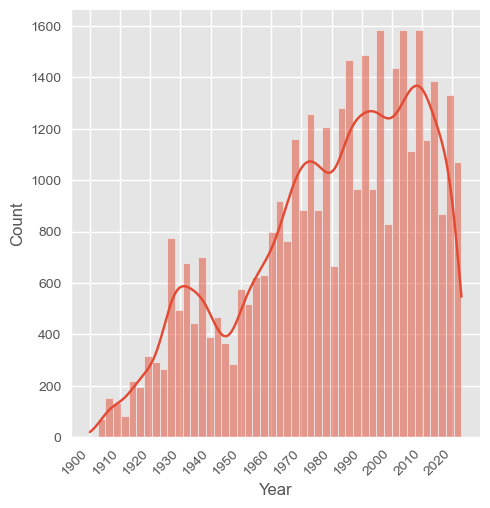

In [60]:
sns.displot(data=df_tmp, x='Year', kde=True)
plt.xticks(rotation=45, fontsize=10, ha='right', ticks=range(1900, 2021, 10))
plt.show()

Посмотрим на уникальные значения интересующих нас столбцов и на их кол-во

In [61]:
df_tmp['Type'].unique()

array(['earthquake', 'nuclear explosion', 'explosion',
       'volcanic eruption'], dtype=object)

In [62]:
df_tmp['Type'].value_counts()

Type
earthquake           37080
nuclear explosion      243
explosion                7
volcanic eruption        1
Name: count, dtype: int64

Cтолбец `Type` содержит информацию о типе события, связанного с землетрясением:

**'earthquake' (землетрясение):** Это обычное землетрясение, вызванное сейсмической активностью в земной коре. Обычно возникает из-за движения тектонических плит.

**'nuclear explosion' (ядерный взрыв):** Это указывает на то, что землетрясение было вызвано ядерным взрывом. Часто связано с ядерными испытаниями или другими взрывами ядерных устройств.

**'explosion' (взрыв):** Это событие, вызванное взрывом, который не является ядерным взрывом. Может включать в себя промышленные взрывы, взрывы в шахтах или другие взрывные события, не связанные с сейсмической активностью.

**'volcanic eruption' (вулканическое извержение):** Это указывает на то, что землетрясение было вызвано вулканической активностью, такой как извержение вулкана. Вулканические землетрясения часто предшествуют или сопровождают вулканические извержения.

In [63]:
df_tmp['status'].unique()

array(['reviewed', 'automatic'], dtype=object)

In [64]:
df_tmp['status'].value_counts()

status
reviewed     37317
automatic       14
Name: count, dtype: int64

Столбец `Status` предоставляет информацию о статусе обработки или оценки землетрясения:

**'reviewed' (рассмотрено):** Это означает, что информация о землетрясении была рассмотрена, проверена и подтверждена экспертами. Возможно, результаты были проверены вручную, и данные считаются надежными и точными.

**'automatic' (автоматическое):** Это указывает на то, что процесс обнаружения и оценки землетрясения был выполнен автоматически, без значительного вмешательства человека. Автоматические системы могут использоваться для мгновенного обнаружения и классификации землетрясений, основываясь на сейсмических данный, но результаты могут требовать дополнительной проверки.

In [65]:
df_tmp['locationSource'].unique()

array(['ushis', 'iscgem', 'iscgemsup', 'official', 'ci', 'uu', 'hv', 'us',
       'a', 'h', 'u', 'g', 'nc', 'ag', 'e', 'b', 'uw', 'doe', 'spe',
       'brk', 'ags', 'pgc', 'bou', 'ak', 'ott', 'ren', 'casc', 'isk',
       'ath', 'the', 'rom', 'gcmt', 'mdd', 'wel', 'guc', 'unm', 'csem',
       'aeic', 'rspr', 'jma', 'nn', 'car', 'sja', 'teh', 'beo', 'ucr',
       'se', 'tul', 'tap', 'thr', 'lim', 'us_wel', 'pr', 'pt'],
      dtype=object)

In [66]:
df_tmp['locationSource'].value_counts()

locationSource
us           23069
iscgem       12890
iscgemsup      587
ushis          189
ak              97
ci              94
nc              57
guc             45
a               44
doe             34
hv              22
unm             21
wel             18
pgc             16
aeic            15
isk             15
ath             14
ags             12
spe             10
rom              7
teh              7
uw               6
pr               6
nn               5
us_wel           4
casc             4
thr              3
jma              3
rspr             3
uu               3
the              3
mdd              2
official         2
g                2
tul              2
gcmt             2
beo              1
brk              1
e                1
lim              1
bou              1
tap              1
se               1
ucr              1
sja              1
ag               1
car              1
ott              1
ren              1
csem             1
b                1
h               

Столбец `locationSource` предоставляет информацию об источнике, откуда были получены данные о местоположении землетрясения:

**'ushis':** Система сейсмического мониторинга США (United States Historical Seismicity).

**'iscgem':** Международный сейсмологический центр (International Seismological Centre, Global Earthquake Model).

**'official':** Данные, полученные от официальных источников или ведомств.

**'ci':** Калифорнийский институт технологии (California Institute of Technology) - сеть сейсмических станций.

**'us':** Система сейсмического мониторинга США (United States Geological Survey).

**'ak':** Аляскинская сейсмическая сеть.

**'jma':** Японская метеорологическая агентство (Japan Meteorological Agency).

**'csem':** Центр сейсмического мониторинга Европы.

**'brk':** Беркли, Калифорния - университет Беркли.

**'gcmt':** Глобальная карта моментов землетрясений (Global Centroid Moment Tensor Network).

Эти значения указывают на различные организации, институты или сети, предоставляющие данные о землетрясениях для анализа и мониторинга. Больше всего данных от системы сейсмического мониторинга США (United States Geological Survey)

In [67]:
df_tmp['magSource'].unique()

array(['pt', 'ell', 'abe', 'uu', 'cdmg', 'iscgem', 'iscgemsup',
       'official', 'hht', 'gr', 'cfr', 'nqt', 'epb', 'dda', 'sjg', 'wy',
       'jon', 'ci', 'mmt', 'pas', 'ntt', 'brk', 'vic', 'woo', 'esm',
       'hvo', 'rot', 'upp', 'mat', 'dor', 'pal', 'mos', 'hv', 'us', 'isc',
       '1020', 'nc', '1000', 'gcmt', '1009', 'uw', '1023', 'hrv', 'ak',
       'par', 'duputel', 'nied', 'nn', 'se', 'pgc', 'us_gcmt', 'us_pgc',
       'pr', 'guc'], dtype=object)

In [68]:
df_tmp['magSource'].value_counts()

magSource
us           13264
iscgem       12873
hrv           8183
gcmt          1432
iscgemsup      587
nc             532
ak              95
ci              94
gr              43
official        25
hv              22
abe             20
brk             16
rot             13
cdmg            12
par              8
sjg              8
wy               7
guc              7
uw               6
pr               6
pas              5
nn               5
hht              5
nied             4
vic              4
uu               4
us_gcmt          3
upp              3
cfr              3
mat              3
ell              3
nqt              3
hvo              3
mmt              3
jon              3
pt               2
duputel          2
1000             2
pgc              2
epb              2
pal              2
us_pgc           1
se               1
dda              1
dor              1
ntt              1
woo              1
1009             1
esm              1
1020             1
isc              1
mo

Столбец `magSource` предоставляет информацию об источнике, откуда были получены данные о магнитуде землетрясения:

**'pt':** Пасадена, Калифорния - использование алгоритмов обработки данных.

**'uu':** Университет Юты (University of Utah) - магнитуда, рассчитанная с использованием данных сейсмической сети Университета Юты.

**'iscgem':** Международный сейсмологический центр (International Seismological Centre, Global Earthquake Model) - использование мировых данных.

**'official':** Данные, полученные от официальных источников или ведомств.

**'ci':** Калифорнийский институт технологии (California Institute of Technology) - сеть сейсмических станций.

**'us':** Система сейсмического мониторинга США (United States Geological Survey).

**'gcmt':** Глобальная карта моментов землетрясений (Global Centroid Moment Tensor Network) - используется для оценки магнитуды и других параметров.

**'ak':** Аляскинская сейсмическая сеть.

**'hrv':** Хорватский сейсмологический центр.

**'nied':** Национальный институт сейсмологии и вулканологии Японии (National Research Institute for Earth Science and Disaster Resilience).

In [69]:
df_tmp['MagType'].unique()

array(['mw', 'ms', 'mint', 'ml', 'mb', 'lg', 'uk', 'fa', 'mh', 'mwc',
       'md', 'mwb', 'mww', 'mwr', 'Ml', 'mwp', 'ms_20', 'Mi'],
      dtype=object)

In [70]:
df_tmp['MagType'].value_counts()

MagType
mw       18700
mwc       5592
mww       4563
mb        4005
mwb       2461
ms        1774
ml         151
mwr         29
uk          15
fa          14
md          10
mh           8
mwp          3
lg           2
mint         1
Ml           1
ms_20        1
Mi           1
Name: count, dtype: int64

Столбец `MagType` содержит информацию о типе магнитуды для землетрясений:

**'mw':** Магнитуда момента (Moment Magnitude). Эта магнитуда предоставляет оценку энергии, высвободившейся в результате землетрясения.

**'ms':** Спектральная магнитуда (S-Wave Magnitude). Измерение силы сейсмических волн.

**'mint':** Момент инерции (Moment of Inertia) магнитуды.

**'ml':** Магнитуда локальная (Local Magnitude). Это стандартная шкала для измерения землетрясений на основе амплитуды.

**'mb':** Больцманн-папаниш (Body-Wave Magnitude). Измерение энергии, передаваемой внутри Земли.

**'lg':** Магнитуда по Лагард (Lg Magnitude). Используется для землетрясений, которые генерируют волны внутри Земли.

**'uk':** Магнитуда Великобритании (United Kingdom Magnitude).

**'fa':** Магнитуда Фукуока-Амаду (Fukuoka-Asano Magnitude).

**'mh':** Магнитуда Хэннингера (Hennings Magnitude).

**'mwc':** Магнитуда момента, скорректированная для глубины (Moment Magnitude Corrected).

**'md':** Магнитуда Дурхама (Durham Magnitude).

**'mwb':** Магнитуда момента, рассчитанная на основе поверхностных волн (Moment Magnitude Body-Wave).

**'mww':** Магнитуда момента для глобальных землетрясений (Moment Magnitude Global).

**'mwr':** Магнитуда момента для телевизионных волн (Moment Magnitude Regional).

**'Ml':** Магнитуда локальная (альтернативное обозначение).

**'mwp':** Магнитуда момента, рассчитанная на основе поверхностных волн (альтернативное обозначение).

**'ms_20':** Спектральная магнитуда с частотой 20 секунд.

**'Mi':** Магнитуда Майкласа (Michaelson Magnitude).

In [71]:
df_tmp['net'].unique()

array(['ushis', 'iscgem', 'iscgemsup', 'official', 'ci', 'uu', 'hv', 'us',
       'nc', 'uw', 'ak', 'gcmt', 'nn', 'se', 'pr', 'pt'], dtype=object)

In [72]:
df_tmp['net'].value_counts()

net
us           23364
iscgem       12873
iscgemsup      587
ushis          189
ak              95
ci              94
nc              55
official        29
hv              22
uw               6
pr               6
nn               5
uu               3
gcmt             1
se               1
pt               1
Name: count, dtype: int64

Столбец `net` (Network) содержит информацию об источнике или сети, которая предоставила данные о землетрясении:

**'ushis':** Система сейсмического мониторинга США (United States Historical Seismicity).

**'iscgem':** Международный сейсмологический центр (International Seismological Centre, Global Earthquake Model).

**'iscgemsup':** Дополнительные данные от Международного сейсмологического центра.

**'official':** Официальные данные от сейсмологических организаций или ведомств.

**'ci':** Калифорнийский институт технологии (California Institute of Technology).

**'uu':** Университет Юты (University of Utah).

**'hv':** Гавайский вулканический обсерваторий (Hawaiian Volcano Observatory).

**'us':** Система сейсмического мониторинга США (United States Geological Survey).

**'nc':** Сеть сейсмического мониторинга Северной Калифорнии (Northern California Seismic System).

**'uw':** Университет Вашингтона (University of Washington).

**'ak':** Аляскинская сейсмическая сеть.

**'gcmt':** Глобальная карта моментов землетрясений (Global Centroid Moment Tensor Network).

**'nn':** Сеть Невады (Nevada Seismological Laboratory).

**'se':** Сеизмологическая сеть США (Seismological Society of America).

**'pr':** Пуэрто-Риканская сейсмическая сеть.

**'pt':** Португальская сейсмическая сеть.

#### Отфильтруем данные по типу события. Нас интересуют только землетрясения

In [73]:
df_eq = df_tmp[df_tmp['Type'] == 'earthquake']

Создадим интерактивную карту зафисированных землятресений

In [74]:
fig = px.scatter_geo(df_eq, lat='Latitude', lon='Longitude',
                     color_continuous_scale='Magma_r',
                     size='Mag',
                     size_max=5,
                     color='Mag',
                     title='Карта значительных землетрясениях в период с 1900 по 2023 гг.')

fig.update_layout(
    geo=dict(
        showland=True,

    ),
    width=1000, 
    height=600, 
)

fig.show()

Это карта также соответствует карте геологических разломов

In [75]:
df_eq.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,net,ID,Updated,Type,status,locationSource,magSource,Year
0,1900-10-09 12:25:00,"16 km SW of Old Harbor, Alaska",57.09,-153.48,NaN,7.86,mw,ushis,ushis391,2022-05-09 14:44:17.838,earthquake,reviewed,ushis,pt,1900
1,1901-03-03 07:45:00,"12 km NNW of Parkfield, California",36.00,-120.50,NaN,6.40,ms,ushis,ushis393,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,ell,1901
2,1901-12-30 22:34:00,south of Alaska,52.00,-160.00,NaN,7.00,ms,ushis,ushis397,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1901
3,1901-12-31 09:02:30,"221 km SW of Nikolski, Alaska",51.45,-171.02,NaN,7.10,ms,ushis,ushis399,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1901
4,1902-01-01 05:20:30,"113 km ESE of Nikolski, Alaska",52.38,-167.45,NaN,7.00,ms,ushis,ushis400,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1902


Посмотрим в каких частях света происходят землятресения наибольшей магнитуды

In [76]:
df_eq.groupby(['Year','Place'])['Mag'].max().reset_index().sort_values('Mag', ascending=False).head(30)

,Year,Place,Mag
8375,1960,1960 Great Chilean Earthquake (Valdivia Earthq...,9.50
9303,1964,"1964 Prince William Sound Earthquake, Alaska",9.20
27343,2011,"2011 Great Tohoku Earthquake, Japan",9.10
24157,2004,2004 Sumatra - Andaman Islands Earthquake,9.10
6682,1952,"89 km ESE of Petropavlovsk-Kamchatsky, Russia",9.00
103,1906,1906 Ecuador-Colombia Earthquake,8.80
26883,2010,"36 km WNW of Quirihue, Chile",8.80
9934,1965,"Rat Islands, Aleutian Islands, Alaska",8.70
6105,1950,1950 Assam-Tibet Earthquake,8.60
7727,1957,"81 km ESE of Adak, Alaska",8.60


Отфильтруем датасет по мощности землятресения. Оставим только магнитуду от 7 баллов и выше

In [77]:
df_eq_mag = df_eq[df_eq['Mag'] >= 7]
df_eq_mag.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,net,ID,Updated,Type,status,locationSource,magSource,Year
0,1900-10-09 12:25:00,"16 km SW of Old Harbor, Alaska",57.09,-153.48,NaN,7.86,mw,ushis,ushis391,2022-05-09 14:44:17.838,earthquake,reviewed,ushis,pt,1900
2,1901-12-30 22:34:00,south of Alaska,52.00,-160.00,NaN,7.00,ms,ushis,ushis397,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1901
3,1901-12-31 09:02:30,"221 km SW of Nikolski, Alaska",51.45,-171.02,NaN,7.10,ms,ushis,ushis399,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1901
4,1902-01-01 05:20:30,"113 km ESE of Nikolski, Alaska",52.38,-167.45,NaN,7.00,ms,ushis,ushis400,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1902
6,1903-01-17 16:05:00,"153 km SE of Adak, Alaska",50.85,-175.16,NaN,7.00,ms,ushis,ushis411,2018-06-04 20:43:44.000,earthquake,reviewed,ushis,abe,1903


Визуализируем эти данные

In [78]:
fig = px.scatter_geo(df_eq_mag, lat='Latitude', lon='Longitude',
                     color_continuous_scale='Magma_r',
                     size='Mag',
                     size_max=7,
                     opacity=0.7,
                     color='Mag',
                     title='Карта землятресений с магнитудой от 7 баллов и выше')

fig.update_layout(
    geo=dict(
        showland=True,

    ),
    width=1000, 
    height=600, 
)


fig.show()

Построим график соотношений магнитуда - десятилетие

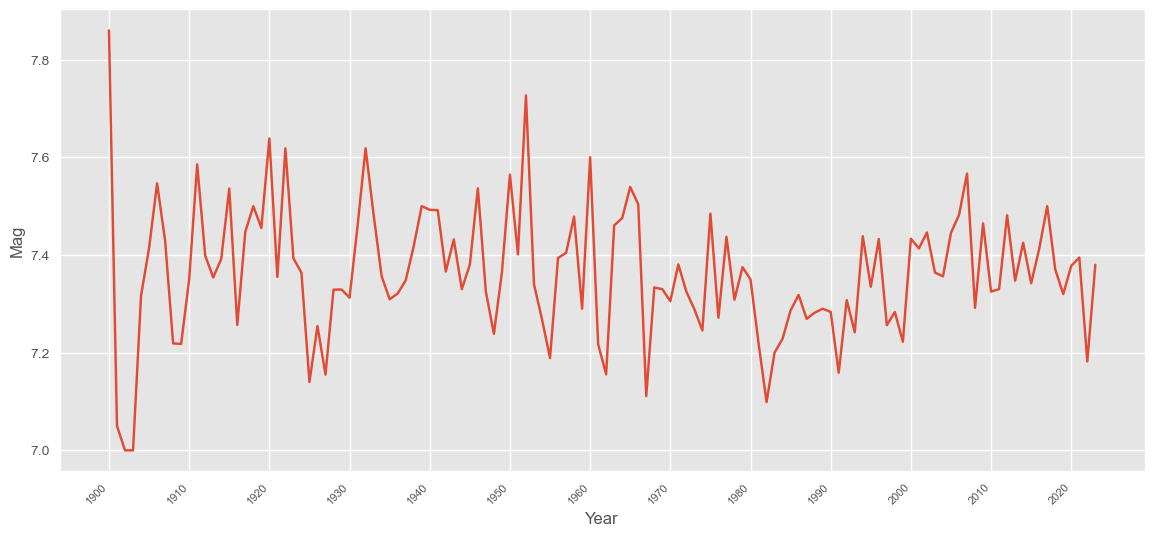

In [85]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_eq_mag, x='Year', y='Mag', errorbar=None)
plt.xticks(rotation=45, fontsize=8, ha='right', ticks=range(1900, 2021, 10))
plt.show()

Исходя из этого графика можно сделать вывод, что в период c 1900 по 2023, если брать землятресения магнитудой от 7 баллов и выше, выше 7.6 баллов случались не часто. Исключения 1900-ые и 1950-ые года

In [102]:
df_eq.agg({'Mag':['mean', 'max', 'min', 'std']})

,Mag
mean,5.949505
max,9.500000
min,5.500000
std,0.456052


Но если убрать фильтрацию по магнитуде (с 7 баллов и выше), то видно, что средняя магнитуда за все годы начиная с 1900-го состовляет почти 6 баллов, со стандартным отклонением в 0.45.

#### Выводы

Этот набор данных можно было бы иследовать и дальше, например, посмотреть на землятресения магнитудой 9 баллов и выше более детально: как часто они происходили в одних и тех же местах, количество жертв, как совершенствовались системы оповещения в наиболее сейсмически-опасных регионах и т.д. Также можно было бы построить дэшборд в таких BI-системах, как Tableau, Power BI, что я возможно и сделаю в последствии.

По итогу, что было сделано в этом анализе данных:

* Проведена необходимая чистка данных, форматирование типов переменных
* Данны пояснения используемым в датасете аббревиатурам, значения которых известно экперту предметной области, но не простому обывателю
* Построены графики, интерактивные карты мира
* Сделан акцент на именно на землятресениях (а не на извержениях вулканов или ядерных взрывах), в особенности магнитудой 7 баллов и выше.

**Спасибо за внимание**